[PolyTaylorSeries] (Cheb) max 0.995012284060948 is at 1.2261336086310493e-09: normalizing
[PolyTaylorSeries] (Cheb) average error = 0.0031449359555822034 in the domain [-1, 1] using degree 2
[sym_qsp] Iterative optimization to err 1.000e-12 or max_iter 100.
iter: 001 --- err: 1.540e-01
iter: 002 --- err: 3.472e-02
iter: 003 --- err: 6.656e-03
iter: 004 --- err: 6.608e-04
iter: 005 --- err: 1.019e-05
iter: 006 --- err: 2.579e-09
iter: 007 --- err: 3.331e-16
[sym_qsp] Stop criteria satisfied.


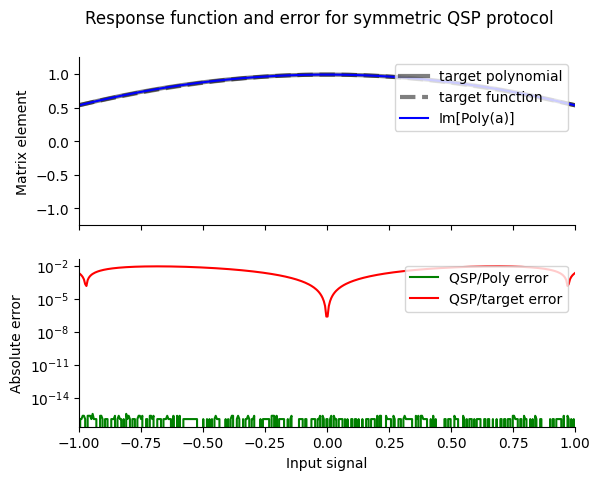

In [1]:
# Import relevant modules and methods.
import numpy as np
import pyqsp
from pyqsp import angle_sequence, response
from pyqsp.poly import (polynomial_generators, PolyTaylorSeries)

# Specify definite-parity target function for QSP.
func = lambda x: np.cos(x)
polydeg = 2 # Desired QSP protocol length.
max_scale = 0.99 # Maximum norm (<1) for rescaling.
true_func = lambda x: max_scale * func(x) # For error, include scale.

"""
With PolyTaylorSeries class, compute Chebyshev interpolant to degree
'polydeg' (using twice as many Chebyshev nodes to prevent aliasing).
"""
poly = PolyTaylorSeries().taylor_series(
    func=func,
    degree=polydeg,
    max_scale=max_scale,
    chebyshev_basis=True,
    cheb_samples=2*polydeg)

# Compute full phases (and reduced phases, parity) using symmetric QSP.
(phiset, red_phiset, parity) = angle_sequence.QuantumSignalProcessingPhases(
    poly,
    method='sym_qsp',
    chebyshev_basis=True)

"""
Plot response according to full phases.
Note that `pcoefs` are coefficients of the approximating polynomial,
while `target` is the true function (rescaled) being approximated.
"""
response.PlotQSPResponse(
    phiset,
    pcoefs=poly,
    target=true_func,
    sym_qsp=True,
    simul_error_plot=True)